In [2]:
import os, glob, artm

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
artm.version()

'0.10.0'

Эксперимент 1 - уникальность имён - число жёстко кластеризуемых векторов и коллизий в зависимости от количества тем при разных типах моделях(юниграмная и биграмная, биграмная, юниграмная) без единичных счётчиков

In [5]:
import numpy as np

In [6]:
dicts=['dictionary_without_single_grams.txt',
       'dictionary_without_single_grams_and_unigrams.txt', 
       'dictionary_without_single_grams_and_bigrams.txt']

for dic in dicts:
    dictionary = artm.Dictionary()
    dictionary.load_text(dictionary_path=dic)
    
    for num_topics in range(1, 20):
        model_artm = artm.ARTM(num_topics=num_topics,
                               dictionary=dictionary,
                               cache_theta=True
                              )
        
        model_artm.num_document_passes = 1
        batch_vectorizer = artm.BatchVectorizer(data_path="all_batches_without_single_grams", data_format='batches')
        model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=20)
        model_artm.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-225))
        model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=10)
        
        theta = model_artm.get_theta()
        
        t_theta=theta.T
        firm_raws_count=0
        for x in range(0, t_theta.shape[0]):
            one_cnt=0
            zero_cnt=0
            other_cnt=0
            for y in range(0, t_theta.shape[1]):
                if t_theta.iloc[x,y]==1:
                    one_cnt+=1
                elif t_theta.iloc[x,y]==0:
                    zero_cnt+=1
                else:
                    other_cnt+=1
            #print(one_cnt, zero_cnt, other_cnt, one_cnt+zero_cnt+other_cnt)
            if one_cnt==1 and zero_cnt==t_theta.shape[1]-1:
                firm_raws_count+=1
        print(num_topics, theta.shape[1], firm_raws_count, firm_raws_count/theta.shape[1])
        
        uniq_names=np.unique(t_theta, axis=0)
        print(num_topics, theta.shape[1], uniq_names.shape[0], theta.shape[1]-uniq_names.shape[0])

1 559 431 0.7710196779964222
1 559 3 556
2 559 19 0.03398926654740608
2 559 449 110
3 559 17 0.03041144901610018
3 559 446 113
4 559 24 0.04293381037567084
4 559 440 119
5 559 20 0.03577817531305903
5 559 444 115
6 559 28 0.05008944543828265
6 559 433 126
7 559 30 0.05366726296958855
7 559 432 127
8 559 35 0.0626118067978533
8 559 430 129
9 559 45 0.08050089445438283
9 559 420 139
10 559 47 0.08407871198568873
10 559 417 142
11 559 50 0.08944543828264759
11 559 414 145
12 559 51 0.09123434704830054
12 559 413 146
13 559 60 0.1073345259391771
13 559 402 157
14 559 58 0.1037567084078712
14 559 404 155
15 559 69 0.12343470483005367
15 559 397 162
16 559 60 0.1073345259391771
16 559 399 160
17 559 79 0.1413237924865832
17 559 379 180
18 559 86 0.15384615384615385
18 559 374 185
19 559 82 0.14669051878354203
19 559 373 186
1 559 386 0.6905187835420393
1 559 3 556
2 559 171 0.30590339892665475
2 559 248 311
3 559 212 0.37924865831842575
3 559 203 356
4 559 220 0.3935599284436494
4 559 185 37

In [2]:
all_meas=[431, 556, 19, 110, 17, 113, 24, 119, 20, 115, 28, 126, 30, 127, 35, 129, 45, 139, 47, 142, 50, 145, 51, 146, 60, 157, 58, 155, 69, 162, 60, 160, 79, 180, 86, 185, 82, 186, 386, 556, 171, 311, 212, 356, 220, 374, 233, 391, 268, 424, 278, 437, 280, 448, 291, 460, 303, 462, 303, 465, 308, 472, 326, 476, 319, 481, 333, 480, 326, 486, 323, 478, 329, 483, 331, 479, 419, 556, 9, 112, 10, 120, 18, 129, 15, 125, 23, 137, 28, 140, 32, 147, 37, 152, 41, 161, 49, 168, 53, 174, 66, 187, 71, 194, 77, 201, 84, 210, 86, 218, 109, 239, 133, 266
]
firm=all_meas[::2]
coll=all_meas[1::2]

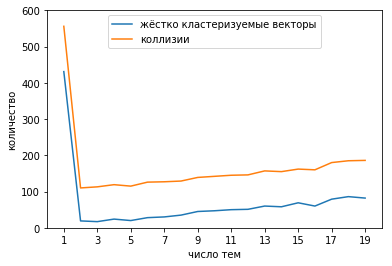

In [3]:
#plt.title('юниграмная и биграмная модель')
plt.plot(range(1,20), firm[:19], label='жёстко кластеризуемые векторы')
plt.plot(range(1,20), coll[:19], label='коллизии')
plt.legend(loc='upper center')
plt.ylabel('количество')
plt.xlabel('число тем')
plt.axis([0, 20, 0, 600])
plt.xticks(range(1,20,2))
plt.show()

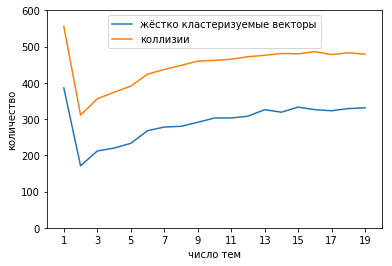

In [4]:
#plt.title('биграмная модель')
plt.plot(range(1,20), firm[19:38], label='жёстко кластеризуемые векторы')
plt.plot(range(1,20), coll[19:38], label='коллизии')
plt.legend(loc='upper center')
plt.ylabel('количество')
plt.xlabel('число тем')
plt.axis([0, 20, 0, 600])
plt.xticks(range(1,20,2))
plt.show()

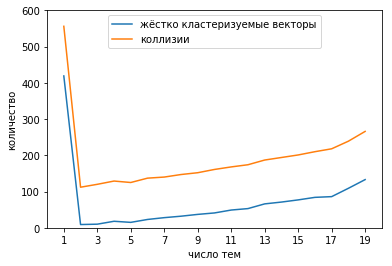

In [5]:
#plt.title('юниграмная модель')
plt.plot(range(1,20), firm[38:], label='жёстко кластеризуемые векторы')
plt.plot(range(1,20), coll[38:], label='коллизии')
plt.legend(loc='upper center')
plt.ylabel('количество')
plt.xlabel('число тем')
plt.axis([0, 20, 0, 600])
plt.xticks(range(1,20,2))
plt.show()

Эксперимент 3 - положительная корреляция - минимальное и среднее расстояния, а также их отношение от количества тем при разных типах моделях(юниграмная и биграмная, биграмная, юниграмная) без единичных счётчиков

In [38]:
from sklearn.metrics.pairwise import cosine_similarity
import collections

In [41]:
dicts=['dictionary_without_single_grams.txt',
       'dictionary_without_single_grams_and_unigrams.txt', 
       'dictionary_without_single_grams_and_bigrams.txt']

for dic in dicts:
    dictionary = artm.Dictionary()
    dictionary.load_text(dictionary_path=dic)
    
    for num_topics in range(1, 20):
        model_artm = artm.ARTM(num_topics=num_topics,
                               dictionary=dictionary,
                               cache_theta=True
                              )
        
        model_artm.num_document_passes = 1
        batch_vectorizer = artm.BatchVectorizer(data_path="all_batches_without_single_grams", data_format='batches')
        model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=20)
        model_artm.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-225))
        model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=10)
        
        theta = model_artm.get_theta()
        
        t_theta=theta.T
        cos_sim=cosine_similarity(t_theta)
        #cos_sim_up=np.triu(cos_sim, k = 1)
        #cos_sim_up_with_one=np.where(cos_sim_up==1)
        #print(num_topics, len(list(zip(cos_sim_up_with_one[0], cos_sim_up_with_one[1]))), cos_sim.shape[0]*cos_sim.shape[1])
        
        dist=cos_sim[np.triu_indices(cos_sim.shape[0], k = 1)]
        count_of_ones=collections.Counter(dist)[1]
        prop_of_ones=count_of_ones/(cos_sim.shape[0]*cos_sim.shape[1])
        print(num_topics, count_of_ones, prop_of_ones, np.min(dist), np.mean(dist), prop_of_ones / np.mean(dist))


1 123753 0.39603367884767393 0.0 0.79348683 0.4991055454123611
2 204 0.0006528396926533133 0.0 0.57750916 0.0011304404023923893
3 107 0.0003424208191858065 0.0 0.46230793 0.0007406769319125272
4 87 0.00027841692774920713 0.0 0.38822472 0.0007171540417735385
5 64 0.0002048124525971179 0.0 0.32897702 0.0006225737392599481
6 101 0.00032321965175482667 0.0 0.28406924 0.0011378199612486954
7 76 0.00024321478745907752 0.0 0.24029545 0.001012148929745875
8 97 0.00031041887346750684 0.0 0.21093254 0.0014716500191879636
9 182 0.000582435412073054 0.0 0.18114118 0.003215367169041731
10 205 0.0006560398872251433 0.0 0.15819736 0.004146971191426836
11 146 0.0004672284074871752 0.0 0.14027964 0.003330693046541544
12 161 0.0005152313260646247 0.0 0.12445663 0.004139846383067263
13 227 0.0007264441678054025 0.0 0.10996745 0.006605992793541488
14 213 0.000681641443799783 0.0 0.09967504 0.006838637481788154
15 250 0.0008000486429574919 0.0 0.09137395 0.00875576289336156
16 227 0.0007264441678054025 0.0

In [6]:
all_meas=[0.39603367884767393, 0.79348683, 0.4991055454123611, 0.0006528396926533133, 0.57750916, 0.0011304404023923893, 0.0003424208191858065, 0.46230793, 0.0007406769319125272, 0.00027841692774920713, 0.38822472, 0.0007171540417735385, 0.0002048124525971179, 0.32897702, 0.0006225737392599481, 0.00032321965175482667, 0.28406924, 0.0011378199612486954, 0.00024321478745907752, 0.24029545, 0.001012148929745875, 0.00031041887346750684, 0.21093254, 0.0014716500191879636, 0.000582435412073054, 0.18114118, 0.003215367169041731, 0.0006560398872251433, 0.15819736, 0.004146971191426836, 0.0004672284074871752, 0.14027964, 0.003330693046541544, 0.0005152313260646247, 0.12445663, 0.004139846383067263, 0.0007264441678054025, 0.10996745, 0.006605992793541488, 0.000681641443799783, 0.09967504, 0.006838637481788154, 0.0008000486429574919, 0.09137395, 0.00875576289336156, 0.0007264441678054025, 0.08195558, 0.008863876638215345, 0.001081665765278529, 0.072296254, 0.014961574084308198, 0.0012064733535798976, 0.06446293, 0.018715769733898824, 0.0011392692675714683, 0.059378315, 0.019186621784616092, 0.31614722175108245, 0.63342756, 0.49910556715697446, 0.03181953462770536, 0.35123593, 0.09059305230069443, 0.031009885401032382, 0.22595783, 0.13723749241257222, 0.026039983230980442, 0.16528565, 0.15754533873290968, 0.024126266877026122, 0.12965351, 0.18608263084026375, 0.02527193653374125, 0.10509101, 0.24047666692772723, 0.023831848976417765, 0.089714654, 0.26564053886005123, 0.022295755581939383, 0.07703644, 0.2894182996273011, 0.021857328925598676, 0.06844257, 0.31935284583673995, 0.02030523455826114, 0.061321206, 0.3311290783947855, 0.019076359842678435, 0.055753928, 0.3421527529485666, 0.017825083765092918, 0.05020112, 0.3550734157960292, 0.01675301858352988, 0.046159714, 0.36293592322612755, 0.016186584144315973, 0.042854533, 0.3777099681755491, 0.015284129275059923, 0.04005197, 0.3816074224141744, 0.015063315849603656, 0.037817582, 0.3983151449292016, 0.013725634518578729, 0.035197966, 0.38995533424495554, 0.013354411948246454, 0.033550635, 0.39803753211010495, 0.012471158246421383, 0.03150073, 0.3959006024217946, 0.3572313196642356, 0.71574306, 0.4991055270985309, 0.00023681439831541758, 0.59942806, 0.00039506725667078367, 0.00007040428058025927, 0.51905686, 0.00013563886052302517, 0.00015360933944783844, 0.4398264, 0.00034924993080539786, 0.00010880661544221889, 0.38011593, 0.000286245873755257, 0.00024001459288724755, 0.33240402, 0.0007220568353223572, 0.00024961517660273744, 0.2869438, 0.0008699096562947298, 0.00041282509976606576, 0.25104517, 0.0016444255986510488, 0.00037442276490410616, 0.22483924, 0.0016652910069593532, 0.0005728348283575641, 0.20093544, 0.002850840216510846, 0.000489629769489985, 0.17245738, 0.002839134884086954, 0.0006752410546561231, 0.15449874, 0.004370527877129939, 0.0008064490321011517, 0.1338563, 0.006024737370978582, 0.0009600583715489902, 0.1186675, 0.008090322842069684, 0.0010368630412729094, 0.104826055, 0.009891272133177307, 0.0012832780233038169, 0.0930509, 0.01379114079501207, 0.0013536823038840763, 0.08088324, 0.016736251752941935, 0.0018081099330839315, 0.07142493, 0.02531482915677156, 0.002550555073748484, 0.06457008, 0.039500573664876346]
prop_of_ones=all_meas[::3]
mean=all_meas[1::3]
prop_ones_mean=all_meas[2::3]

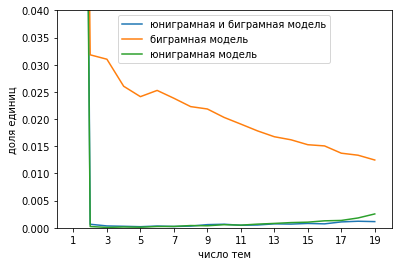

In [7]:
#plt.title('prop_of_ones')
plt.plot(range(1,20), prop_of_ones[:19], label='юниграмная и биграмная модель')
plt.plot(range(1,20), prop_of_ones[19:38], label='биграмная модель')
plt.plot(range(1,20), prop_of_ones[38:57], label='юниграмная модель')
plt.legend(loc='upper center')
plt.ylabel('доля единиц')
plt.xlabel('число тем')
plt.axis([0, 20, 0, 0.04])
plt.xticks(range(1,20,2))
plt.show()

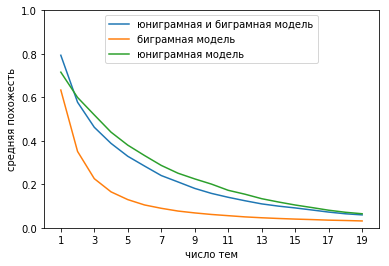

In [8]:
#plt.title('mean')
plt.plot(range(1,20), mean[:19], label='юниграмная и биграмная модель')
plt.plot(range(1,20), mean[19:38], label='биграмная модель')
plt.plot(range(1,20), mean[38:57], label='юниграмная модель')
plt.legend(loc='upper center')
plt.ylabel('средняя похожесть')
plt.xlabel('число тем')
plt.axis([0, 20, 0, 1])
plt.xticks(range(1,20,2))
plt.show()

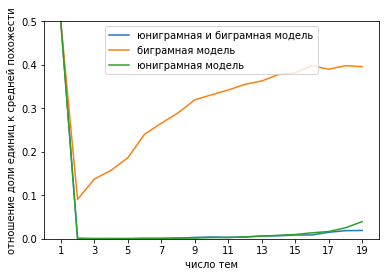

In [9]:
#plt.title('prop_ones_mean')
plt.plot(range(1,20), prop_ones_mean[:19], label='юниграмная и биграмная модель')
plt.plot(range(1,20), prop_ones_mean[19:38], label='биграмная модель')
plt.plot(range(1,20), prop_ones_mean[38:57], label='юниграмная модель')
plt.legend(loc='upper center')
plt.ylabel('отношение доли единиц к средней похожести')
plt.xlabel('число тем')
plt.axis([0, 20, 0, 0.5])
plt.xticks(range(1,20,2))
plt.show()